APLICAÇÕES EM APRENDIZADO DE MÁQUINA-T01-2024-2

Checkout de Presença do Módulo 4 - Aprendizado de máquina não supervisionado

Aluno: Rafael Kashirajima




CARREGAMENTO DOS DADOS


In [1]:
import pandas as pd

# Carregamento dos dados
df = pd.read_csv('housing.csv')



ANÁLISE EXPLORATÓRIA


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

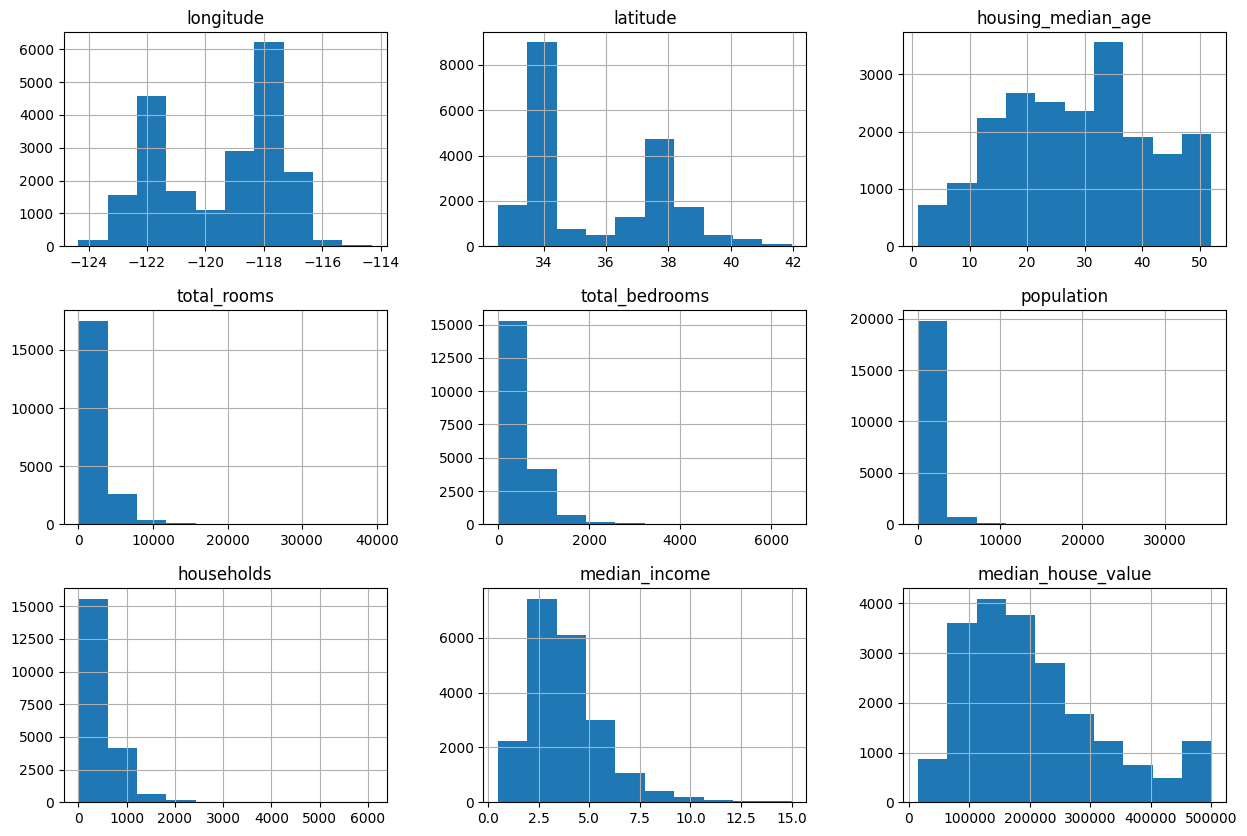

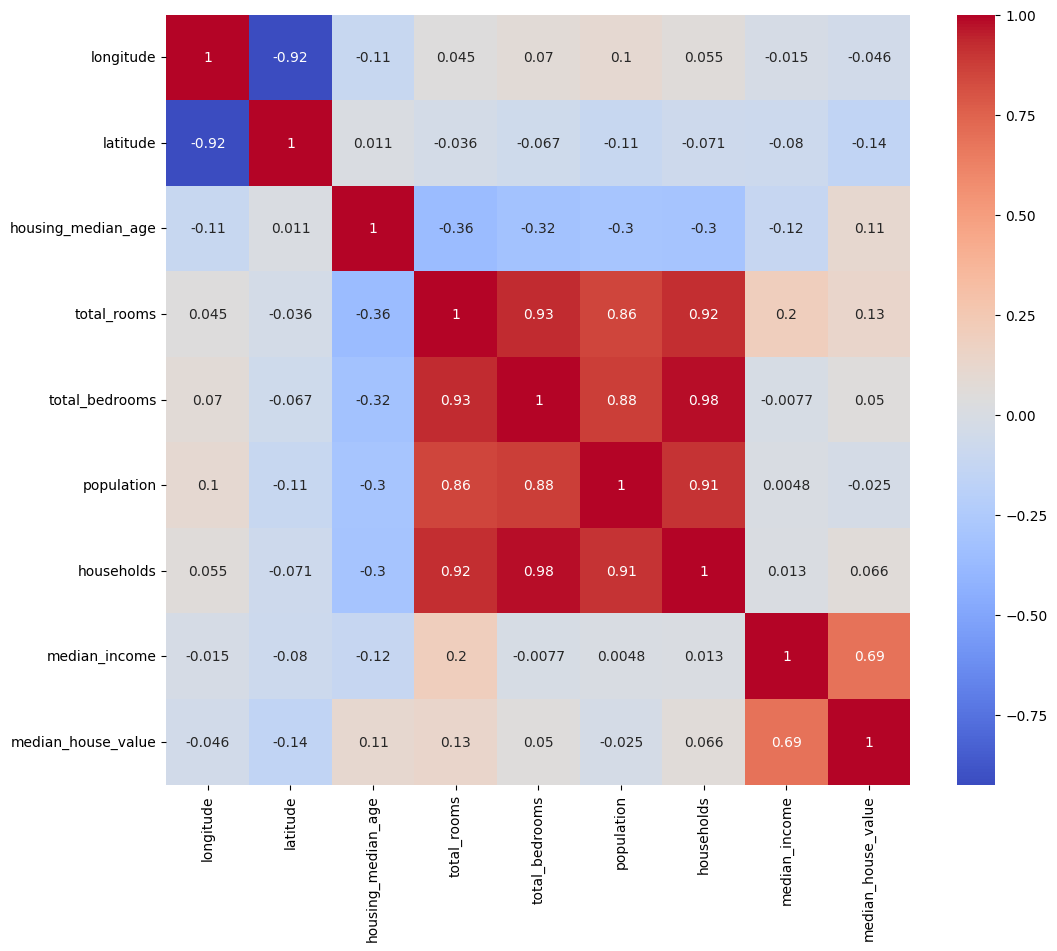

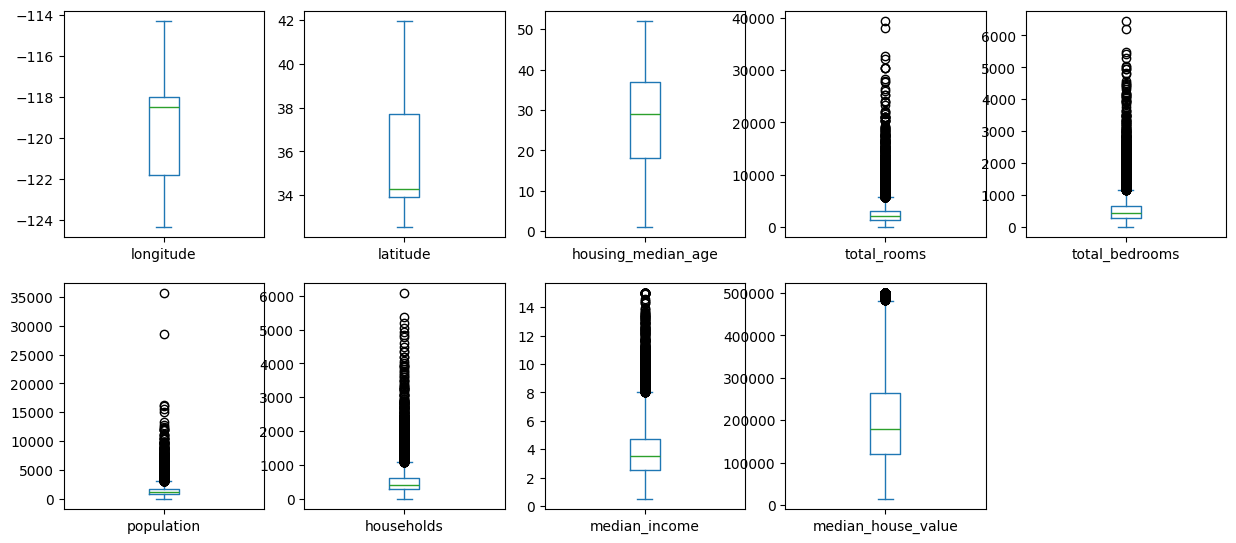

In [2]:
# Visualização das primeiras linhas do DataFrame
print(df.head())

# Informações sobre o DataFrame (tipos de dados, valores não nulos, etc.)
print(df.info())

# Descrição estatística das colunas numéricas
print(df.describe())

# Verificação de valores ausentes
print(df.isnull().sum())

# Histograma de cada coluna numérica
df.hist(figsize=(15,10))

# Matriz de correlação
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
# The argument numeric_only=True is added to df.corr()
# to only include numeric columns for correlation calculation
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

# Boxplot para cada coluna numérica para identificar outliers
df.plot(kind='box', subplots=True, layout=(3,5), figsize=(15,10))
plt.show()



IDENTIFICAÇÃO DE CLUSTERS:


<ipython-input-3-6cf1767c2df4>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['total_bedrooms'].fillna(X['total_bedrooms'].mean(), inplace=True)
<ipython-input-3-6cf1767c2df4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['total_bedrooms'].fillna(X['total_bedrooms'].mean(), inplace=True)


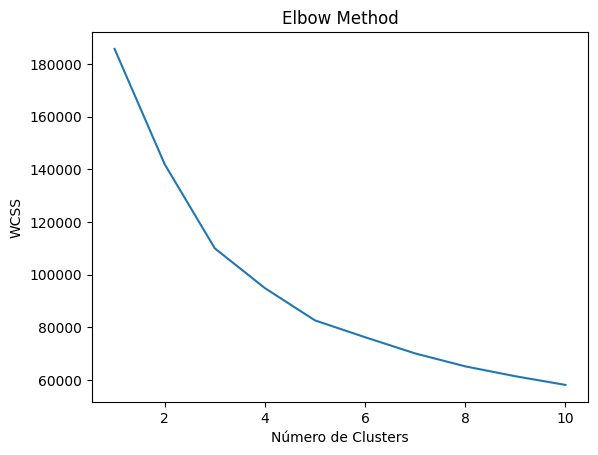

In [3]:
#Calculando o número de Clusters através da técnica do cotovelo

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecionar as colunas relevantes para a clusterização (exemplo)
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
X = df[features]

# Lidar com valores ausentes (exemplo: preenchimento com a média)
X['total_bedrooms'].fillna(X['total_bedrooms'].mean(), inplace=True)

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Executar o KMeans para diferentes valores de k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico do Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

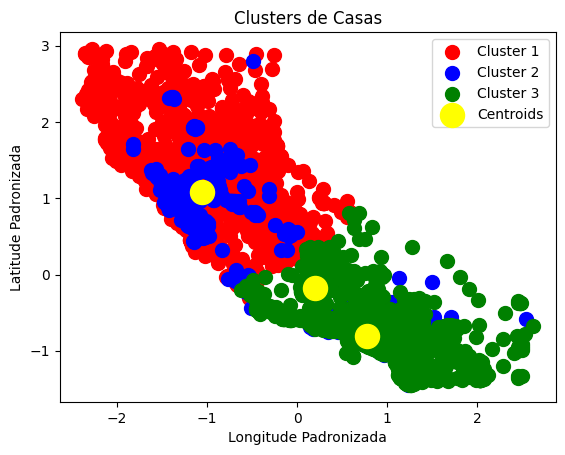

In [4]:
# Aplicar o KMeans com k=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Adicionar as labels dos clusters ao DataFrame original
df['cluster'] = y_kmeans

# Visualizar os clusters (exemplo com duas features)
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters de Casas')
plt.xlabel('Longitude Padronizada')
plt.ylabel('Latitude Padronizada')
plt.legend()
plt.show()



Interpretação do gráfico:
- O cluster vermelho (Cluster 1) é o maior em termos de número de pontos, indicando uma região com alta densidade.
- O cluster azul (Cluster 2) parece ser o menor e mais concentrado.
- O cluster verde (Cluster 3) apresenta uma dispersão maior, indicando maior variabilidade.
- Os centroides mostram as médias de cada cluster em termos de latitude e longitude. Eles podem ser interpretados como "representantes" de cada grupo.



Insights:

Os centroides podem representar as áreas centrais ou mais estratégicas de cada cluster, funcionando como pontos médios que resumem suas características principais.


Cluster 1 (vermelho):

- É possível que represente regiões com custos elevados, devido à alta concentração de pessoas.
- Essa área pode ser de grande interesse, onde a procura por imóveis supera a oferta disponível.
- Por estar localizada em uma região mais central, tende a atrair trabalhadores que buscam proximidade com seus locais de trabalho.
- Também pode demandar investimentos significativos em transporte público e infraestrutura para atender à densidade da população.

Cluster 2 (azul):

- Pode corresponder a uma zona com menor densidade populacional, o que reflete uma oferta mais reduzida de imóveis.

Cluster 3 (verde):

- Provavelmente representa áreas mais acessíveis financeiramente, caracterizadas pela maior disponibilidade de terrenos.
- Pode ser mais atraente para pessoas que buscam locais tranquilos ou imóveis com valores mais baixos.
- Essa região pode ter como prioridade melhorias na conectividade e no desenvolvimento de infraestrutura habitacional.